# 필요한 라이브러리 불러오기 및 폰트 설정

In [1]:
import os
import numpy as np
import pandas as pd
import gc

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [106]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [10, 8]

# 1. 데이터 파악 및 시각화 과정

##데이터 로드 및 사이즈 체크

In [107]:
os.listdir('./drive/MyDrive/machine_learning_data')

['f_test.csv',
 'f_train.csv',
 'friend.csv',
 'new_friend.csv',
 'abalone.data',
 'train.csv',
 'test.csv',
 'train2.csv',
 '.DS_Store']

In [108]:
# 데이터 로드
train_df = pd.read_csv('./drive/MyDrive/machine_learning_data/f_train.csv')
test_df = pd.read_csv('./drive/MyDrive/machine_learning_data/f_test.csv')

In [109]:
# 사이즈 체크
print('train_df.shape : ',train_df.shape)
print('test_df.shape : ',test_df.shape) 

train_df.shape :  (600, 12)
test_df.shape :  (243, 11)


##데이터 프레임 정보 확인

In [110]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [111]:
test_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 기술통계량 확인

In [114]:
train_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [115]:
test_df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


## 각 feature들과 타겟값인 관객수의 상관관계 확인

### groupby를 이용하여 장르에 따른 관객수 확인

In [116]:
# 장르를 기준으로 데이터를 묶음.
train_df[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


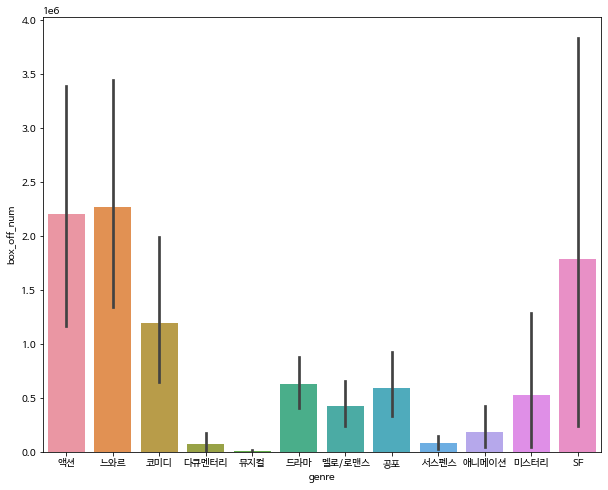

In [117]:
sns.barplot(data= train_df,
            x = 'genre',
            y= 'box_off_num',
            )
plt.show()

### groupby를 이용하여 배급사에 따른 관객수 확인

In [118]:
# 배급사를 기준으로 데이터를 묶음.
train_df[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num')

,box_off_num
distributor,
인피니티엔터테인먼트,2.000000e+00
고구마공작소,8.000000e+00
사람과 사람들,4.200000e+01
위드시네마,4.600000e+01
나우콘텐츠,5.400000e+01
...,...
영구아트무비,2.541603e+06
쇼박스(주)미디어플렉스,2.634823e+06
(주)아이필름코퍼레이션,3.117859e+06


### scatterplot를 이용하여 연속형 변수와 관객수의 관계를 확인

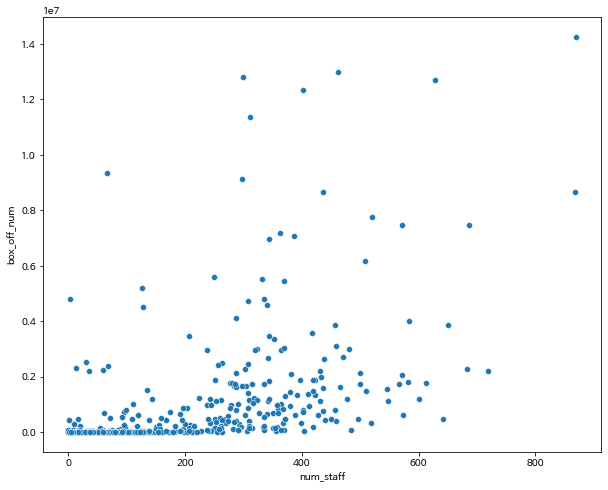

In [119]:
sns.scatterplot(data = train_df,
                x= 'num_staff', y= 'box_off_num',
                )
plt.show()

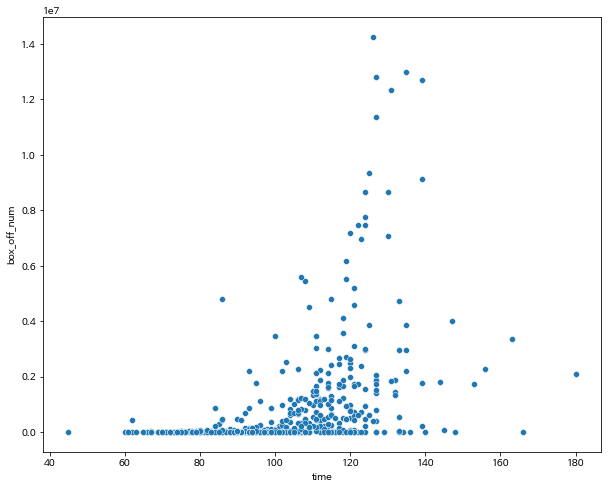

In [120]:
sns.scatterplot(data = train_df,
                x= 'time', y= 'box_off_num',
                )
plt.show()

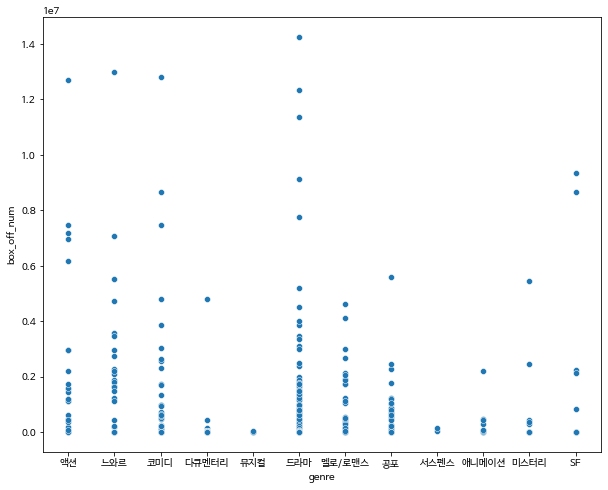

In [121]:
sns.scatterplot(data = train_df,
                x= 'genre', y= 'box_off_num',
                )
plt.show()

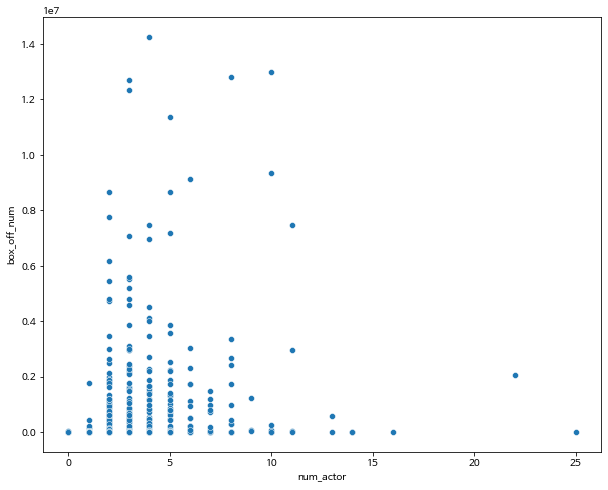

In [122]:
sns.scatterplot(data = train_df,
                x= 'num_actor', y= 'box_off_num',
                )
plt.show()

### 히스토그램을 이용하여 연속형 변수와 관객수의 관계를 확인

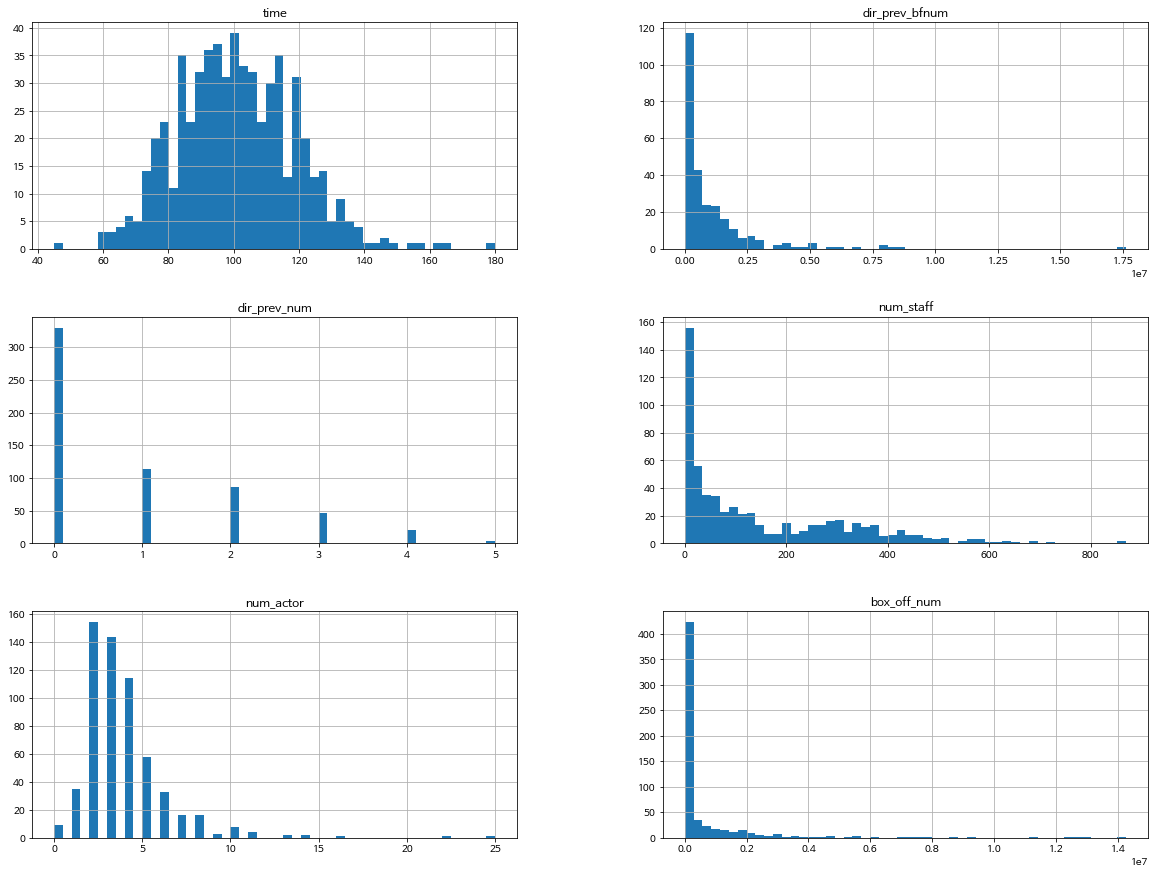

In [123]:
# 히스토그램

train_df.hist(bins = 50, figsize = (20,15))
plt.show()

### heatmap를 이용하여 연속형 변수와 관객수의 관계를 확인

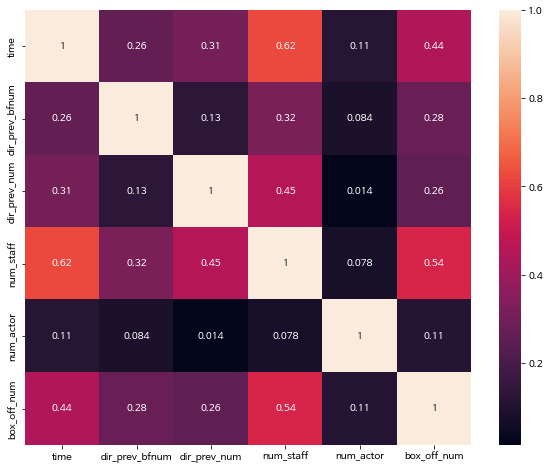

In [124]:
sns.heatmap(train_df.corr(), annot = True)

# 2. 데이터 전처리

## 아날로그 변수 라벨 인코딩

In [125]:
encoding_columns = ['title', 'distributor', 'genre', 'screening_rat', 'director']
train_not_encoding_columns = ['release_time', 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num']
test_not_encoding_columns = ['release_time', 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']

In [126]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label

> train데이터와 test 데이터의 경우 따로 인코딩을 하였을 때
같은 값이라도 다른 정수값을 갖거나 반대의 경우가 발생 할 수 O
- 데이터프레임을 합쳐 인코딩 후 다시 분리.
- 0~599번 row까지가 train, 이후가 test

In [127]:
df1 = train_df[encoding_columns]
df2 = test_df[encoding_columns]
enc_df= pd.concat([df1,df2])
enc_df

,title,distributor,genre,screening_rat,director
0,개들의 전쟁,롯데엔터테인먼트,액션,청소년 관람불가,조병옥
1,내부자들,(주)쇼박스,느와르,청소년 관람불가,우민호
2,은밀하게 위대하게,(주)쇼박스,액션,15세 관람가,장철수
3,나는 공무원이다,(주)NEW,코미디,전체 관람가,구자홍
4,불량남녀,쇼박스(주)미디어플렉스,코미디,15세 관람가,신근호
...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,15세 관람가,안슬기
239,울보 권투부,인디스토리,다큐멘터리,12세 관람가,이일하
240,어떤살인,(주)컨텐츠온미디어,느와르,청소년 관람불가,안용훈
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,청소년 관람불가,송동윤


In [128]:
enc_result= enc_df.apply(encoding_label)
enc_result

,title,distributor,genre,screening_rat,director
0,39,97,10,3,517
1,158,27,2,3,327
2,593,27,10,1,467
3,124,7,11,2,26
4,369,122,11,1,282
...,...,...,...,...,...
238,803,93,4,1,302
239,571,167,3,0,394
240,509,43,2,3,303
241,269,32,4,3,273


In [129]:
enc_df1= enc_result.iloc[0:600]
enc_df1

,title,distributor,genre,screening_rat,director
0,39,97,10,3,517
1,158,27,2,3,327
2,593,27,10,1,467
3,124,7,11,2,26
4,369,122,11,1,282
...,...,...,...,...,...
595,802,7,4,3,296
596,756,27,4,1,347
597,402,23,1,3,58
598,491,60,2,1,252


In [130]:
enc_df2= enc_result.iloc[600:]
enc_df2

,title,distributor,genre,screening_rat,director
0,558,133,2,3,147
1,483,27,5,0,353
2,784,60,4,0,1
3,602,27,10,1,470
4,763,60,1,1,38
...,...,...,...,...,...
238,803,93,4,1,302
239,571,167,3,0,394
240,509,43,2,3,303
241,269,32,4,3,273


>연속형 변수에는 적용하지 않고 라벨 인코딩한 값과 concat하여 다시 원래의 데이터프레임 형태로 돌려놓음

In [131]:
not_enc_df1 = train_df[train_not_encoding_columns]
not_enc_df1

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,2012-11-22,96,NaN,0,91,2,23398
1,2015-11-19,130,1161602.50,2,387,3,7072501
2,2013-06-05,123,220775.25,4,343,4,6959083
3,2012-07-12,101,23894.00,2,20,6,217866
4,2010-11-04,108,1.00,1,251,2,483387
...,...,...,...,...,...,...,...
595,2014-08-13,111,3833.00,1,510,7,1475091
596,2013-03-14,127,496061.00,1,286,6,1716438
597,2010-09-30,99,NaN,0,123,4,2475
598,2015-05-14,102,NaN,0,431,4,2192525


In [132]:
train_df= pd.concat([enc_df1,not_enc_df1],  axis= 1)
train_df

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,39,97,10,3,517,2012-11-22,96,NaN,0,91,2,23398
1,158,27,2,3,327,2015-11-19,130,1161602.50,2,387,3,7072501
2,593,27,10,1,467,2013-06-05,123,220775.25,4,343,4,6959083
3,124,7,11,2,26,2012-07-12,101,23894.00,2,20,6,217866
4,369,122,11,1,282,2010-11-04,108,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,802,7,4,3,296,2014-08-13,111,3833.00,1,510,7,1475091
596,756,27,4,1,347,2013-03-14,127,496061.00,1,286,6,1716438
597,402,23,1,3,58,2010-09-30,99,NaN,0,123,4,2475
598,491,60,2,1,252,2015-05-14,102,NaN,0,431,4,2192525


In [133]:
not_enc_df2 = test_df[test_not_encoding_columns]
not_enc_df2

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,2010-01-07,125,3.005290e+05,2,304,3
1,2010-01-14,113,3.427002e+05,4,275,3
2,2010-01-28,115,4.206611e+06,3,419,7
3,2010-02-04,116,6.913420e+05,2,408,2
4,2010-02-18,110,3.173800e+04,1,380,1
...,...,...,...,...,...,...
238,2015-11-19,78,2.590000e+03,1,4,4
239,2015-10-29,86,NaN,0,18,2
240,2015-10-28,107,NaN,0,224,4
241,2015-10-22,102,5.069900e+04,1,68,7


In [134]:
test_df= pd.concat([enc_df2,not_enc_df2],  axis= 1)
test_df

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,558,133,2,3,147,2010-01-07,125,3.005290e+05,2,304,3
1,483,27,5,0,353,2010-01-14,113,3.427002e+05,4,275,3
2,784,60,4,0,1,2010-01-28,115,4.206611e+06,3,419,7
3,602,27,10,1,470,2010-02-04,116,6.913420e+05,2,408,2
4,763,60,1,1,38,2010-02-18,110,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,803,93,4,1,302,2015-11-19,78,2.590000e+03,1,4,4
239,571,167,3,0,394,2015-10-29,86,NaN,0,18,2
240,509,43,2,3,303,2015-10-28,107,NaN,0,224,4
241,269,32,4,3,273,2015-10-22,102,5.069900e+04,1,68,7


## 개봉일 변수를 month값을 이용하여 계절 변수로 변경
(  개봉일 변수값의 5-6번 인덱스 값을 이용 )

In [135]:
train_df.head()

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,39,97,10,3,517,2012-11-22,96,NaN,0,91,2,23398
1,158,27,2,3,327,2015-11-19,130,1161602.50,2,387,3,7072501
2,593,27,10,1,467,2013-06-05,123,220775.25,4,343,4,6959083
3,124,7,11,2,26,2012-07-12,101,23894.00,2,20,6,217866
4,369,122,11,1,282,2010-11-04,108,1.00,1,251,2,483387


In [136]:
train_df['month'] = train_df['release_time'].apply(lambda x: int(x[5:7]))
train_df.head()

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month
0,39,97,10,3,517,2012-11-22,96,NaN,0,91,2,23398,11
1,158,27,2,3,327,2015-11-19,130,1161602.50,2,387,3,7072501,11
2,593,27,10,1,467,2013-06-05,123,220775.25,4,343,4,6959083,6
3,124,7,11,2,26,2012-07-12,101,23894.00,2,20,6,217866,7
4,369,122,11,1,282,2010-11-04,108,1.00,1,251,2,483387,11


In [137]:
test_df['month'] = test_df['release_time'].apply(lambda x: int(x[5:7]))
test_df.head()

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month
0,558,133,2,3,147,2010-01-07,125,3.005290e+05,2,304,3,1
1,483,27,5,0,353,2010-01-14,113,3.427002e+05,4,275,3,1
2,784,60,4,0,1,2010-01-28,115,4.206611e+06,3,419,7,1
3,602,27,10,1,470,2010-02-04,116,6.913420e+05,2,408,2,2
4,763,60,1,1,38,2010-02-18,110,3.173800e+04,1,380,1,2


> 계절 col 생성 (초기값 : 0)
- 1: 봄, 2: 여름, 3: 가을, 4: 겨울

In [138]:
train_df['season'] = 0
test_df['season'] = 0

In [139]:
def month_to_season(month):
  if month in [3, 4, 5]:
    return 1
  elif month in [6, 7, 8]:
    return 2
  elif month in [9, 10, 11]:
    return 3
  elif month in [12, 1, 2]:
    return 4

train_df['season'] = train_df['month'].apply(lambda x: month_to_season(x))

In [140]:
train_df.head()

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
0,39,97,10,3,517,2012-11-22,96,NaN,0,91,2,23398,11,3
1,158,27,2,3,327,2015-11-19,130,1161602.50,2,387,3,7072501,11,3
2,593,27,10,1,467,2013-06-05,123,220775.25,4,343,4,6959083,6,2
3,124,7,11,2,26,2012-07-12,101,23894.00,2,20,6,217866,7,2
4,369,122,11,1,282,2010-11-04,108,1.00,1,251,2,483387,11,3


In [141]:
train_df['season']

0      3
1      3
2      2
3      2
4      3
      ..
595    2
596    1
597    3
598    1
599    4
Name: season, Length: 600, dtype: int64

In [142]:
test_df['season'] = test_df['month'].apply(lambda x: month_to_season(x))

In [143]:
test_df.head()

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
0,558,133,2,3,147,2010-01-07,125,3.005290e+05,2,304,3,1,4
1,483,27,5,0,353,2010-01-14,113,3.427002e+05,4,275,3,1,4
2,784,60,4,0,1,2010-01-28,115,4.206611e+06,3,419,7,1,4
3,602,27,10,1,470,2010-02-04,116,6.913420e+05,2,408,2,2,4
4,763,60,1,1,38,2010-02-18,110,3.173800e+04,1,380,1,2,4


In [144]:
test_df['season']

0      4
1      4
2      4
3      4
4      4
      ..
238    3
239    3
240    3
241    3
242    3
Name: season, Length: 243, dtype: int64

- 계절 변수에 대한 scatterplot 확인

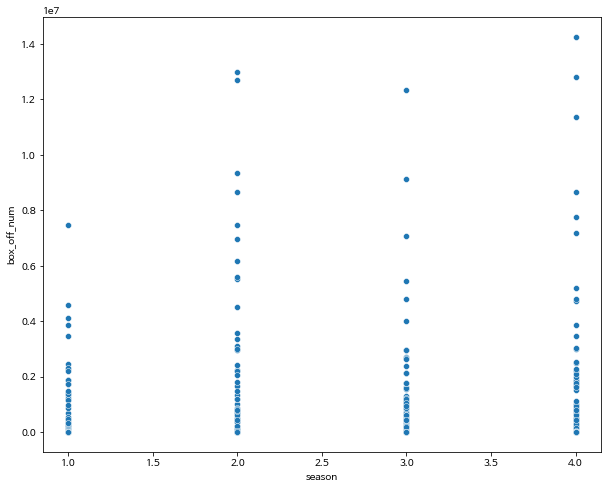

In [145]:
sns.scatterplot(data = train_df,
                x= 'season', y= 'box_off_num',
                )
plt.show()

## 중복값 처리
- 중복값이 X

In [146]:
train_df.duplicated().sum()

0

## 결측치 처리

In [147]:
train_df.isnull().sum()

title               0
distributor         0
genre               0
screening_rat       0
director            0
release_time        0
time                0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
month               0
season              0
dtype: int64

> 이전 작품의 관객수가 Nan인 데이터는 이전 작품이 없음. -> 결측치를 0으로 대체.

In [148]:
NaN_condition = train_df['dir_prev_bfnum'].isnull()
train_df[NaN_condition]

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
0,39,97,10,3,517,2012-11-22,96,NaN,0,91,2,23398,11,3
6,108,115,3,2,420,2013-05-23,104,NaN,0,32,5,53526,5,1
8,3,162,6,2,490,2014-09-18,129,NaN,0,3,5,4778,9,3
9,694,13,4,1,254,2012-03-15,94,NaN,0,138,3,868,3,1
10,16,5,5,3,530,2015-07-27,89,NaN,0,0,4,745,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,150,192,7,3,554,2013-09-12,97,NaN,0,5,3,1132,9,3
594,542,23,11,3,164,2014-03-20,94,NaN,0,37,5,1958,3,1
597,402,23,1,3,58,2010-09-30,99,NaN,0,123,4,2475,9,3
598,491,60,2,1,252,2015-05-14,102,NaN,0,431,4,2192525,5,1


In [149]:
train_df= train_df.fillna(0)

In [150]:
train_df.isnull().sum()

title             0
distributor       0
genre             0
screening_rat     0
director          0
release_time      0
time              0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
month             0
season            0
dtype: int64

In [151]:
test_df.isnull().sum()

title               0
distributor         0
genre               0
screening_rat       0
director            0
release_time        0
time                0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
month               0
season              0
dtype: int64

In [152]:
test_df=test_df.fillna(0)

In [153]:
test_df.isnull().sum()

title             0
distributor       0
genre             0
screening_rat     0
director          0
release_time      0
time              0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
month             0
season            0
dtype: int64

## 이상치 처리

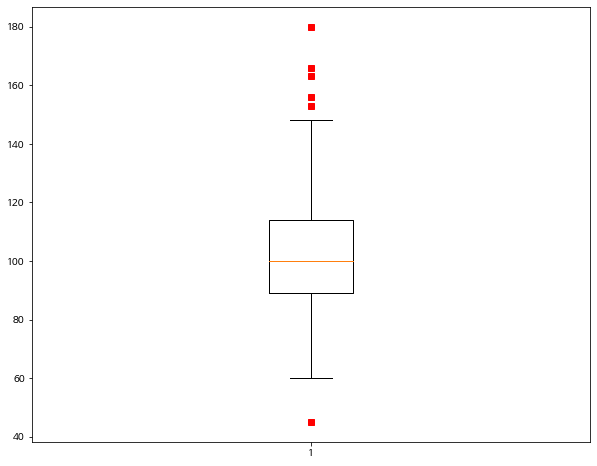

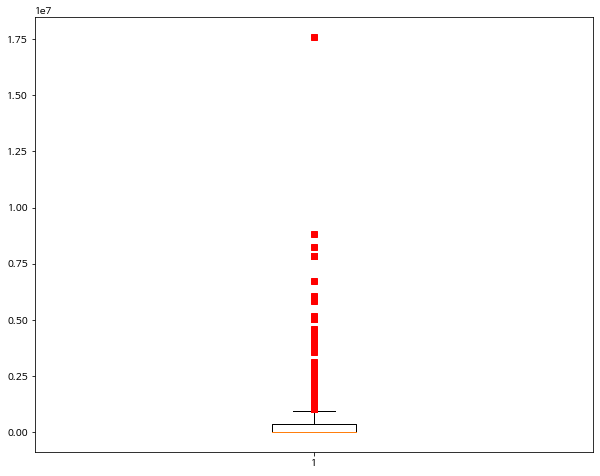

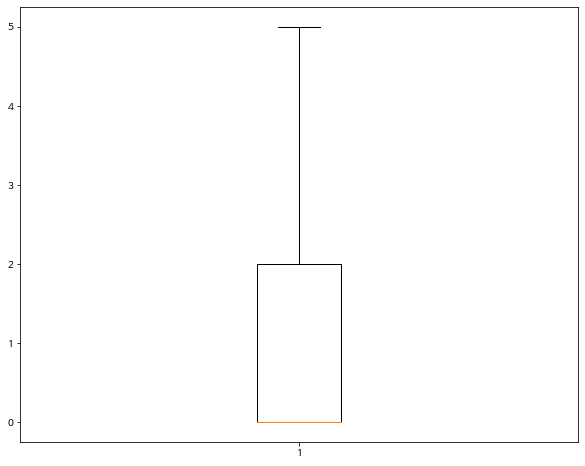

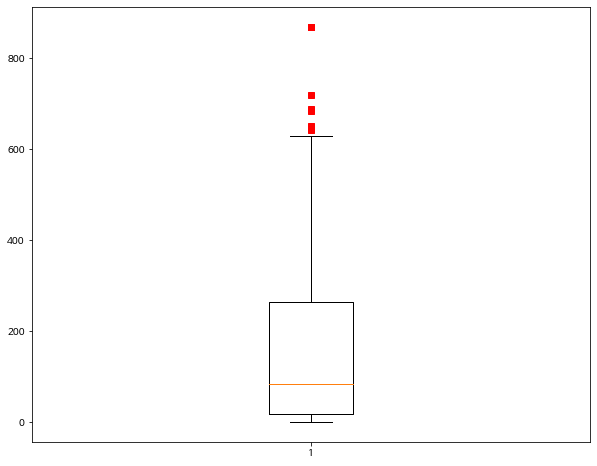

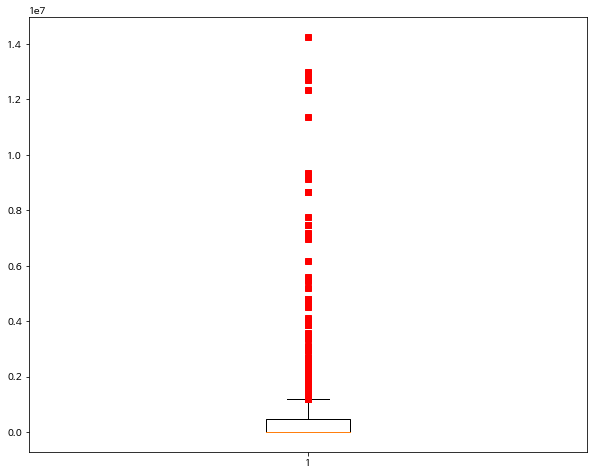

In [154]:
boxing_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'box_off_num']
for col in boxing_columns:
  plt.boxplot(train_df[col],
            sym='rs',
          )
  plt.show() 

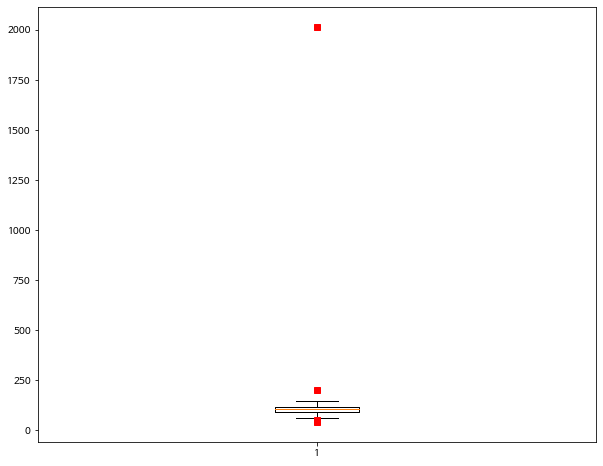

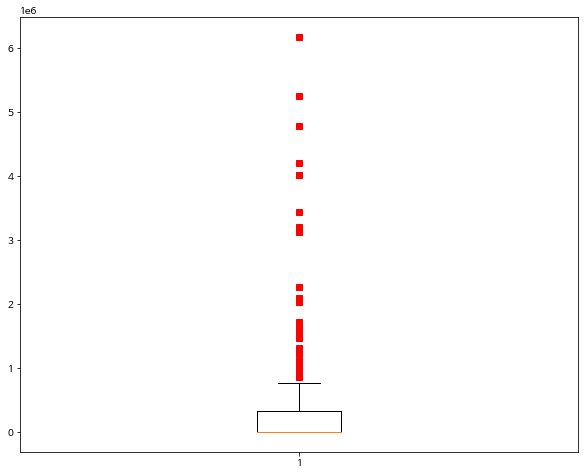

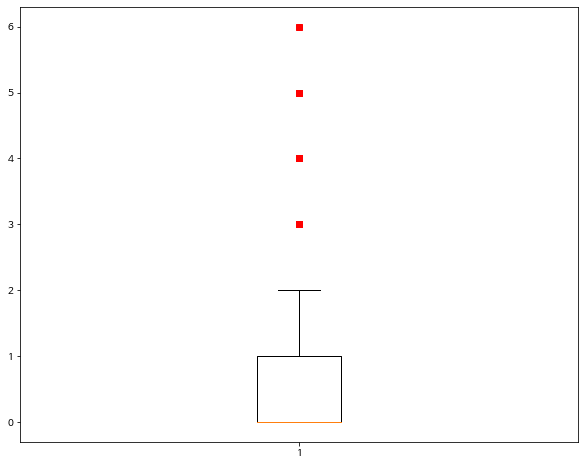

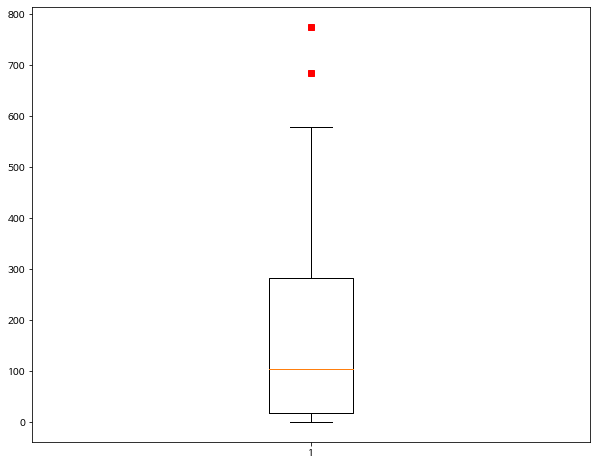

In [155]:
boxing_columns = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff']
for col in boxing_columns:
  plt.boxplot(test_df[col],
            sym='rs',
          )
  plt.show() 

> 사분위수값을 이용한 이상치 처리 시 너무 많은 데이터 손실이 발생. -> 데이터를 정렬하여 크기가 너무 크거나, 작은 값들만 처리

In [156]:
train_df.sort_values('time')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
545,148,132,4,3,380,2012-11-15,45,3.389000e+03,1,2,2,2919,11,3
319,570,142,3,2,166,2012-07-19,60,0.000000e+00,0,2,5,328,7,2
428,794,201,3,2,483,2014-12-10,61,3.453333e+02,3,2,6,71,12,4
574,389,183,4,1,483,2012-09-13,61,4.240000e+02,2,6,8,188,9,3
194,313,202,4,0,6,2015-10-15,62,0.000000e+00,0,3,2,152,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,631,60,10,3,5,2013-04-10,153,8.448210e+05,3,335,6,1744585,4,1
477,831,27,2,3,156,2010-12-22,156,5.046096e+06,1,683,3,2260512,12,4
209,603,133,4,3,5,2010-07-14,163,0.000000e+00,0,353,8,3350311,7,2
438,400,100,4,3,217,2015-05-21,166,0.000000e+00,0,180,4,4398,5,1


- 2015분의 러닝타임을 이상치로 판단하여 처리 

In [157]:
test_df.sort_values('time')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
140,547,142,5,2,90,2013-01-03,40,0.0,0,1,2,1,4
130,187,78,7,3,295,2013-10-02,50,0.0,0,0,1,10,3
201,700,147,9,2,388,2015-02-05,60,0.0,0,0,6,2,4
39,20,199,5,3,265,2011-11-24,65,0.0,0,39,2,11,3
72,625,77,7,3,18,2012-12-13,68,0.0,0,0,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,559,27,10,1,329,2013-12-24,137,1095700.0,2,376,6,12,4
179,78,27,10,1,346,2014-07-23,137,719587.0,1,685,2,7,2
70,103,60,4,2,5,2011-01-20,144,573001.0,1,403,5,1,4
33,715,3,4,3,491,2010-12-30,198,138190.0,1,230,8,12,4


In [158]:
test_df.iloc[224, 6]= test_df['time'].mean()

In [159]:
test_df.iloc[[224]]

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
224,446,35,9,2,593,2015-09-10,109.798354,0.0,0,4,5,9,3


- 1761만명의 이전작품 관객수가 이상치일 가능성이 있어 찾아본 결과 '명량'이라는 영화의 관객수와 동일하여 처리 X

In [160]:
train_df.sort_values('dir_prev_bfnum')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
0,39,97,10,3,517,2012-11-22,96,0.0,0,91,2,23398,11,3
350,761,130,4,0,53,2012-01-18,124,0.0,0,496,4,467697,1,4
349,779,28,4,1,460,2015-10-22,70,0.0,0,94,4,1611,10,3
348,48,203,4,1,221,2011-12-07,100,0.0,0,237,4,60944,12,4
347,817,186,9,2,402,2011-08-18,85,0.0,0,2,5,4586,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,731,97,4,3,10,2014-09-03,147,7838528.5,2,583,4,4015364,9,3
118,228,148,11,0,297,2010-12-29,103,7855474.0,1,31,5,2541603,12,4
16,475,58,11,1,10,2011-05-04,124,8223342.0,1,572,11,7453715,5,1
214,699,7,0,1,71,2010-11-10,114,8801639.0,2,500,3,2130645,11,3


In [161]:
test_df.sort_values('dir_prev_bfnum')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
121,256,97,4,3,335,2013-06-06,126.0,0.000000e+00,0,236,3,6,2
128,167,81,4,1,524,2013-10-30,118.0,0.000000e+00,0,175,3,10,3
130,187,78,7,3,295,2013-10-02,50.0,0.000000e+00,0,0,1,10,3
131,434,97,4,0,413,2013-10-02,122.0,0.000000e+00,0,207,3,10,3
132,63,77,5,3,547,2013-11-28,85.0,0.000000e+00,0,18,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,561,60,10,3,400,2014-06-04,116.0,4.016688e+06,2,514,2,6,2
2,784,60,4,0,1,2010-01-28,115.0,4.206611e+06,3,419,7,1,4
178,284,60,10,1,143,2014-07-30,128.0,4.781084e+06,2,776,3,7,2
74,247,77,5,3,246,2012-12-06,76.0,5.243377e+06,3,3,3,12,4


In [162]:
train_df.sort_values('num_staff')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
307,184,104,3,2,249,2010-08-26,75,4.814592e+05,4,0,1,240,8,2
22,580,176,1,1,168,2015-08-13,91,0.000000e+00,0,0,1,914,8,2
541,512,151,4,2,319,2011-08-25,90,0.000000e+00,0,0,5,732,8,2
432,633,77,5,3,162,2014-05-29,89,0.000000e+00,0,0,1,1,5,1
482,143,200,3,0,423,2014-09-25,82,0.000000e+00,0,0,1,600,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,831,27,2,3,156,2010-12-22,156,5.046096e+06,1,683,3,2260512,12,4
320,701,97,10,1,143,2011-08-10,122,2.079989e+06,1,687,4,7482180,8,2
201,36,27,10,3,336,2015-01-21,135,1.949111e+06,4,719,3,2192276,1,4
505,804,97,0,0,375,2014-08-06,130,1.843895e+06,3,868,2,8666208,8,2


In [163]:
test_df.sort_values('num_staff')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
214,627,132,3,2,611,2015-05-07,106.0,0.0,0,0,1,5,1
202,408,141,9,0,590,2015-01-22,77.0,0.0,0,0,2,1,4
19,254,60,9,2,341,2010-08-19,85.0,0.0,0,0,10,8,2
188,639,5,5,3,367,2014-11-27,74.0,1058.0,1,0,2,11,3
84,275,23,3,1,145,2012-10-18,77.0,0.0,0,0,2,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,628,60,4,0,8,2015-04-09,112.0,868591.5,2,552,4,4,1
184,105,97,2,1,150,2014-12-24,116.0,1646142.0,1,564,6,12,4
229,354,60,10,1,171,2015-08-05,123.0,97469.0,3,579,4,8,2
179,78,27,10,1,346,2014-07-23,137.0,719587.0,1,685,2,7,2


In [164]:
train_df.sort_values('num_actor')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
391,286,168,3,2,260,2015-05-14,96,0.000000e+00,0,3,0,1827,5,1
355,540,48,6,2,490,2015-10-22,80,0.000000e+00,0,0,0,862,10,3
167,288,131,3,2,538,2013-03-28,75,0.000000e+00,0,11,0,10942,3,1
437,134,30,3,0,128,2015-12-03,120,0.000000e+00,0,2,0,21576,12,4
168,273,77,3,2,175,2015-03-12,66,0.000000e+00,0,13,0,65,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,770,167,3,2,460,2013-12-12,96,0.000000e+00,0,4,14,2178,12,4
231,220,196,4,0,397,2013-02-28,85,4.950685e+05,2,173,14,5317,2,4
511,411,121,4,3,550,2014-10-30,120,0.000000e+00,0,103,16,1547,10,3
486,375,7,5,0,253,2015-08-20,127,4.210890e+06,3,572,22,2057896,8,2


In [165]:
test_df.sort_values('num_actor')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,month,season
31,557,124,3,0,119,2010-12-05,93.0,0.0,0,1,0,12,4
94,496,97,3,2,453,2012-05-24,91.0,924019.0,1,3,0,5,1
164,713,23,3,2,113,2014-04-17,69.0,0.0,0,12,0,4,1
109,82,131,3,2,405,2013-02-14,84.0,0.0,0,3,0,2,4
214,627,132,3,2,611,2015-05-07,106.0,0.0,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,254,60,9,2,341,2010-08-19,85.0,0.0,0,0,10,8,2
153,1,64,4,3,43,2014-06-26,107.0,0.0,0,97,10,6,2
32,377,64,3,2,158,2010-12-16,105.0,0.0,0,3,11,12,4
71,22,97,11,1,497,2012-12-19,104.0,0.0,0,274,13,12,4


- 이상치일 수 도 있는 관객수가 낮은 영화 5개를 조사해본 결과 모두 해당 영화의 관객수와 일치하기 때문에 처리 X

In [166]:
train_df.sort_values('box_off_num')

,title,distributor,genre,screening_rat,director,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,season
432,633,77,5,3,162,2014-05-29,89,0.000000e+00,0,0,1,1,5,1
324,692,171,4,3,114,2014-09-25,92,0.000000e+00,0,3,4,2,9,3
338,728,76,5,3,17,2015-09-03,78,1.761531e+07,1,27,3,8,9,3
410,630,5,5,3,379,2012-11-08,71,0.000000e+00,0,0,3,10,11,3
481,243,3,4,1,540,2011-11-10,98,0.000000e+00,0,1,2,36,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,75,60,4,1,561,2012-09-13,131,1.552541e+06,2,402,3,12323595,9,3
498,498,27,10,1,548,2015-07-22,139,5.169479e+06,4,628,3,12706663,7,2
530,13,7,11,1,436,2013-01-23,127,8.190495e+05,2,300,8,12811435,1,4
362,199,27,2,1,548,2012-07-25,135,2.564692e+06,3,462,10,12983841,7,2


# 3. 모델 개발 및 학습

## 모델링

-  영화의 이름, 배급사는 관객 수에 다른 요소들보다 영향이 적고, 너무 많은 값들이 존재하여 예측에 필요한 변수에서 제외
- 감독의 이름 또한 많은 값들이 존재하여 예측에 사용하기 어렵기 때문에 전작의 평균 관객수를 대신 사용.
- 전작의 관객 수보다 전작의 개수는 예측에 사용하기엔 부족하다고 판단하여 제외.

In [167]:
features = ['genre', 'screening_rat', 'time', 'dir_prev_num', 'num_staff', 'num_actor', 'season']
target = ['box_off_num']
x_data= train_df[features]
y_data= train_df[target]
x_test = test_df[features]

In [168]:
print(y_data)

     box_off_num
0          23398
1        7072501
2        6959083
3         217866
4         483387
..           ...
595      1475091
596      1716438
597         2475
598      2192525
599      7166532

[600 rows x 1 columns]


> skewness 확인
- (1) target

- 왼쪽으로 쏠려있는 y_data값을 정규분포와 가깝도록 log변환을 취함.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76c872ba30>]],
      dtype=object)

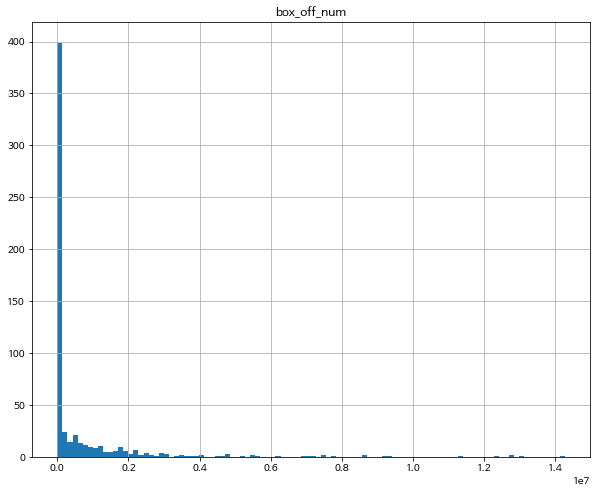

In [169]:
y_data.hist(bins=100)

In [170]:
y_data.skew()

box_off_num    4.332118
dtype: float64

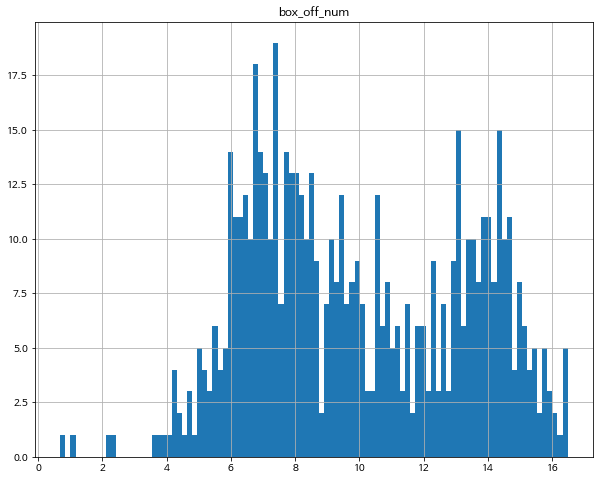

In [171]:
log_y_data= np.log1p(y_data)
log_y_data.hist(bins=100);

In [172]:
print(y_data)

     box_off_num
0          23398
1        7072501
2        6959083
3         217866
4         483387
..           ...
595      1475091
596      1716438
597         2475
598      2192525
599      7166532

[600 rows x 1 columns]


In [173]:
print(log_y_data)

     box_off_num
0      10.060449
1      15.771725
2      15.755558
3      12.291640
4      13.088575
..           ...
595    14.204231
596    14.355762
597     7.814400
598    14.600565
599    15.784933

[600 rows x 1 columns]


- (2) Features

- skewness 가 1보다 큰 features에 log 변환을 적용

In [174]:
skewness = x_data.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

num_actor        2.950668
dir_prev_num     1.252762
num_staff        1.233452
genre            1.001770
time             0.345649
season          -0.035352
screening_rat   -0.045377
dtype: float64

In [175]:
skew_feats = skewness[skewness>1].index
log_x_data= x_data.copy()
log_x_data[skew_feats] = np.log1p(x_data[skew_feats])

In [176]:
log_x_data.apply(lambda x: x.skew()).sort_values(ascending=False)

dir_prev_num     0.660969
time             0.345649
num_actor        0.062556
season          -0.035352
screening_rat   -0.045377
genre           -0.542793
num_staff       -0.706262
dtype: float64

In [177]:
print(x_data)

     genre  screening_rat  time  dir_prev_num  num_staff  num_actor  season
0       10              3    96             0         91          2       3
1        2              3   130             2        387          3       3
2       10              1   123             4        343          4       2
3       11              2   101             2         20          6       2
4       11              1   108             1        251          2       3
..     ...            ...   ...           ...        ...        ...     ...
595      4              3   111             1        510          7       2
596      4              1   127             1        286          6       1
597      1              3    99             0        123          4       3
598      2              1   102             0        431          4       1
599     10              1   120             0        363          5       4

[600 rows x 7 columns]


In [195]:
log_x_data = StandardScaler().fit_transform(log_x_data)
log_x_train, log_x_val, log_y_train, log_y_val = train_test_split(log_x_data, log_y_data, test_size= 0.2, random_state=2022)

## train set으로 모델 학습

- 모델을 학습시키고 최종 metric을 반환하는 함수
- 정수값을 이용해야하는 결정트리와 선형회귀에서는 값을 반올림하여 정수로 변환시켜 사용.

In [199]:
def RMSE_expm1(y_pred, y_true):
    return np.sqrt(np.mean(np.square(np.expm1(y_pred) - np.expm1(y_true))))


def train(x_train, y_train, x_val, y_val, algo, feval):
    kwargs = {}
    if algo.startswith('lgb'):
        print('lgb 실행')
        params = {
            'num_iterations': 10**5
        }
        model = LGBMRegressor(**params)
        kwargs['verbose'] = False
        kwargs['eval_set'] = [(x_val, y_val)]
        kwargs['early_stopping_rounds'] = 100
        def lgb_eval_metric(y_true, y_pred):
            return feval.__name__, feval(y_pred, y_true), True
        kwargs['eval_metric'] = lgb_eval_metric
        model.fit(x_train, y_train, **kwargs)
        pred = model.predict(x_val)
        rmse = feval(pred, y_val.to_numpy())
    elif algo == 'lr':
        print('lr 실행')
        model = LinearRegression()
        model.fit(x_train, y_train, **kwargs)
        pred = model.predict(x_val)
        rmse = feval(pred, y_val.to_numpy())
    elif algo == 'dt':
        print('dt')
        model = DecisionTreeClassifier()
        model.fit(x_train, y_train.round().astype({'box_off_num': 'int'}), **kwargs)
        pred = model.predict(x_val)
        rmse = feval(pred, y_val.to_numpy())
    elif algo == 'xgb':
        print('xgb 실행')
        model= XGBRegressor()
        model.fit(x_train, y_train, **kwargs)
        pred = model.predict(x_val)
        rmse = feval(pred, y_val.to_numpy())
    elif algo == 'rf':
        print('rf 실행')
        model= RandomForestClassifier()
        model.fit(x_train, y_train.round().astype({'box_off_num': 'int'}), **kwargs)
        pred = model.predict(x_val)
        rmse = feval(pred, y_val.to_numpy())
        
    return rmse


# 실험 결과를 저장할 데이터프레임
archive = pd.DataFrame(columns=['rmse'])

# 4. 모델 예측 및 평가

## 예측 수행

In [200]:
%%time
for algo in ['lgb', 'lr', 'xgb', 'dt','rf']:
  rmse = train(log_x_train, log_y_train, log_x_val, log_y_val, algo, RMSE_expm1)
  archive.loc[algo, 'rmse'] = rmse

lgb 실행
lr 실행
xgb 실행
[10:59:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
dt
rf 실행
CPU times: user 304 ms, sys: 6.91 ms, total: 311 ms
Wall time: 317 ms


## RMSE 지표로 평가

In [201]:
# rmse 수치
archive = archive.astype(int)
archive

,rmse
lgb,1487403
lr,1978777
xgb,1641992
dt,2323503
rf,1946665
